<a href="https://colab.research.google.com/github/Nawedul07/Decision_Boundary/blob/main/decision_boundary_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')



In [ ]:
%matplotlib inline

# Data generator


In [ ]:
samples = 1000
# Generate X values
X = np.random.normal(0, 3, int(samples/2))
# Generate Y values with a quadratic pattern and noise
y = list(X[:int(samples/4)]**2 + np.random.normal(-40, 10, int(samples/4))) + list(-X[int(samples/4):]**2 + np.random.normal(40, 10, int(samples/4)))

# Generate second set of X values
X2 = 4 * np.random.random(int(samples/8)) - 2 + np.random.normal(0.1, 1, int(samples/8))
Y2 = 10 * np.random.random(int(samples/8)) - 6 + np.random.normal(0, 1, int(samples/8))

# Generate third set of X values
X3 = np.random.normal(0, 3, int(3 * samples / 8))

# Generate Y3 values with a quadratic pattern and noise
y3 = list(X3[:int(samples/8)]**2 + np.random.normal(-80, 10, int(samples/8))) + \
     list(-X3[int(samples/8):]**2 + np.random.normal(80, 10, int(2 * samples/8)))
# Combine data points
Xs = list(X) + list(X2) + list(X3)
ys = list(y) + list(Y2) + list(y3)

# Create labels
labels = [0 for i in range(int(samples/2))] + [1 for i in range(int(samples/2))]

# Create DataFrame
df = pd.DataFrame({'X': Xs, 'Y': ys, 'class': labels})

# Display sample data
print(df.sample(5))




            X          Y  class
595  0.942985   0.331375      1
670  0.999557 -82.192541      1
290  3.325626  30.409664      0
927 -2.384981  69.307692      1
957 -1.131995  79.056080      1


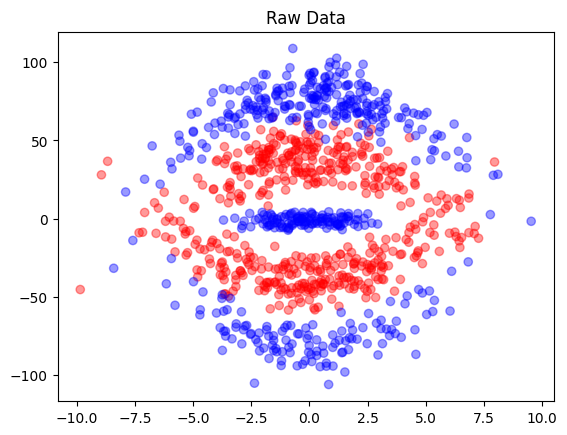

plotted


In [ ]:
plt.scatter(Xs, ys, c=labels, alpha=0.4, cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.title("Raw Data")
plt.show(block = True )
print("plotted")

In [ ]:
features = df.drop(columns = ["class"])
classes = df[["class"]]

#Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(features, classes)

LogisticRegression()

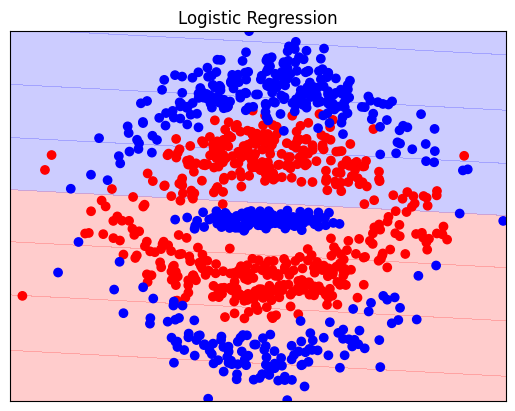

In [ ]:
x_min, x_max = features.values[:,0].min() - .5, features.values[:, 0].max() +.5
y_min, y_max = features.values[:,1].min() - .5, features.values[:, 1].max() +.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))

# plot the decision boundary
z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
z =z.reshape(xx.shape)
plt.contourf(xx, yy, z,alpha = 0.2 ,cmap=ListedColormap(["#FF0000", "#0000FF"]))

# plot raw data
plt.scatter(features.values[:,0], features.values[:,1], c = labels, cmap = ListedColormap(["#FF0000", "#0000FF"]))

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic Regression")
plt.xticks([])
plt.yticks([])
plt.show()

# Neural Networkk

In [ ]:
from sklearn.neural_network import MLPClassifier  # a multi layer perceptron
model = MLPClassifier(hidden_layer_sizes = (10,10,10,10,10,10,10), random_state = 5)

In [ ]:
model.fit(features, classes)

MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10), random_state=5)

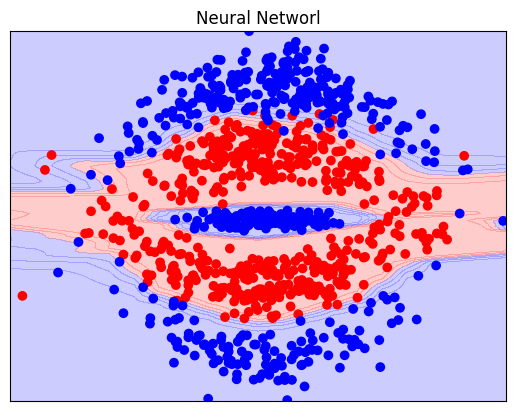

In [ ]:
z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
z =z.reshape(xx.shape)
plt.contourf(xx, yy, z,alpha = 0.2 ,cmap=ListedColormap(["#FF0000", "#0000FF"]))

# plot raw data
plt.scatter(features.values[:,0], features.values[:,1], c = labels, cmap = ListedColormap(["#FF0000", "#0000FF"]))

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Neural Networl")
plt.xticks([])
plt.yticks([])
plt.show()